#### 사전 준비

In [1]:
# 기본적인 패키지부터 추가
import numpy as np
import pandas as pd
import scipy as super

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
# 한글 설정/차트 마이너스 깨짐현상 해결 / seaborn 화면설정
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

NameError: name 'plt' is not defined

In [ ]:
# 머신러닝 패키지 import
import statsmodels.api as sm #안쓸듯
import sklearn as sk

#### 전체 데이터로드
농어 길이, 무게 45개 샘플

In [28]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

##### 농어 길이와 무게간 상관관계 확인

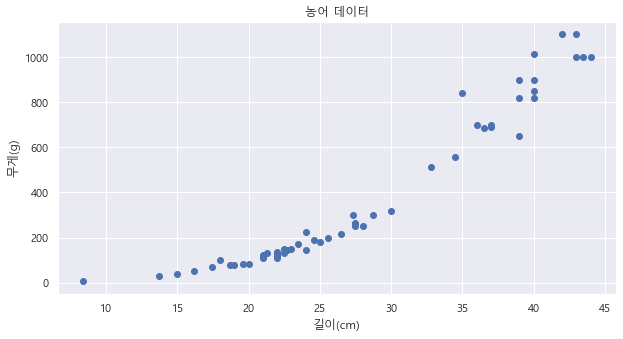

In [6]:
plt.figure(figsize=(10,5))
plt.scatter(x=perch_length, y=perch_weight)
plt.title("농어 데이터")
plt.xlabel("길이(cm)")
plt.ylabel("무게(g)")

plt.show()

#### 훈련세트 테스트세트 분리

In [29]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [8]:
# 훈련세트는 2차원 배열이어야하는데
train_input

array([19.6, 22. , 18.7, 17.4, 36. , 25. , 40. , 39. , 43. , 22. , 20. ,
       22. , 24. , 27.5, 43. , 40. , 24. , 21. , 27.5, 40. , 32.8, 26.5,
       36.5, 13.7, 22.7, 15. , 37. , 35. , 28.7, 23.5, 39. , 21. , 23. ,
       22. , 44. , 22.5, 19. , 37. , 22. , 25.6, 42. , 34.5])

In [11]:
train_input.shape
#1차원 배열임

(42,)

In [33]:
temp = np.column_stack((train_input))
temp.shape
#우리가 만드려고 하는 형식이 아님

(1, 42)

In [49]:
# 2차원 형태 변환(1번째 방법)
new_train_input = train_input.reshape(-1,1)
new_train_input.shape

(42, 1)

In [38]:
# 2차원 형태 변환(2번째 방법)
new_train_target = np.row_stack((train_target))
new_train_target

array([[  85.],
       [ 135.],
       [  78.],
       [  70.],
       [ 700.],
       [ 180.],
       [ 850.],
       [ 820.],
       [1000.],
       [ 120.],
       [  85.],
       [ 130.],
       [ 225.],
       [ 260.],
       [1100.],
       [ 900.],
       [ 145.],
       [ 115.],
       [ 265.],
       [1015.],
       [ 514.],
       [ 218.],
       [ 685.],
       [  32.],
       [ 145.],
       [  40.],
       [ 690.],
       [ 840.],
       [ 300.],
       [ 170.],
       [ 650.],
       [ 110.],
       [ 150.],
       [ 110.],
       [1000.],
       [ 150.],
       [  80.],
       [ 700.],
       [ 120.],
       [ 197.],
       [1100.],
       [ 556.]])

In [46]:
new_test_input = np.row_stack((test_input))
new_test_target = np.row_stack((test_target))

In [40]:
print(new_train_input.shape,new_train_target.shape)

(42, 1) (42, 1)


### 결정계수($R^2$)
- Tex문법

In [41]:
from sklearn.neighbors import KNeighborsRegressor

In [81]:
knr = KNeighborsRegressor()
# KNN훈련 (반드시 훈련세트는 2차원배열이 돼야함!!!)
#knr.fit(X=train_input, y=train_target) # 1차원배열이라 사용 불가
knr.fit(X=new_train_input, y=train_target) # 1차원배열이라 사용 불가

KNeighborsRegressor()

In [82]:
# 테스트시에도 X값은 2차원배열 돼야함!!!
#knr.score(X=test_input, y=test_target)
knr.score(X=new_test_input, y=test_target)
# 결정계수 = 0.9928

0.992809406101064

### MAE
Mean Absolute Error (평균 절대값 오차)

In [84]:
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측을 만듦
test_pred = knr.predict(X=new_test_input)

In [85]:
# 실제 테스트할 농어 길이 리스트
new_test_input

array([[ 8.4],
       [18. ],
       [27.5],
       [21.3],
       [22.5],
       [40. ],
       [30. ],
       [24.6],
       [39. ],
       [21. ],
       [43.5],
       [16.2],
       [28. ],
       [27.3]])

In [86]:
# 실제 측정된 농어의 무게 리스트
test_target

array([   5.9,  100. ,  250. ,  130. ,  130. ,  820. ,  320. ,  188. ,
        900. ,  125. , 1000. ,   51.5,  250. ,  300. ])

In [87]:
# 예측된 무게 세트
test_pred

array([  60. ,   79.6,  248. ,  122. ,  136. ,  847. ,  311.4,  183.4,
        847. ,  113. , 1010. ,   60. ,  248. ,  248. ])

In [61]:
# 테스트 타겟 세트에 대한 평균 절대값 오차(MAE)를 계산
mae = mean_absolute_error(y_true=test_target, y_pred=test_pred)
mae

19.157142857142862

결과에서 예측이 평균적으로 19.15g 정도 타깃값과 다르게 예측되었음

#### 과소적합(underfitting)

- 훈련세트보다 테스트세트의 테스팅 결과(결정계수값)가 더 좋을 경우
- 훈련세트와 테스트세트의 결정계수값이 모두 낮은 경우

In [ ]:
"""# 테스트시에도 X값은 2차원배열 돼야함!!!
knr.score(X=new_test_input, y=test_target)
# 결정계수 = 0.9928"""

In [63]:
# 실제 테스트로 결정계수 구하기
knr.score(X=new_train_input, y=train_target)

0.9698823289099254

#### 과대적합(overfitting)

- 훈련세트로 나온 결정계수는 매우 좋음, 근데 테스트세트에서 나온 결정계수가 매우 나쁠때

### 현재의 과소적합 문제를 해결할 방법

모델을 조금 더 복잡하게 만들면 된다 -> n_neighbors 기본 5

In [64]:
# 최근접 이웃의 갯수를 줄임
knr.n_neighbors = 3 # 원래 5

# 재훈련
knr.fit(X=new_train_input, y=train_target)
knr.score(X=new_test_input, y=test_target)

0.9746459963987609

In [65]:
knr.score(X=new_train_input, y=train_target)
# 과소적합 문제를 해결함 [훈련 결정계수 > 테스트 결정계수]

0.9804899950518966

### 확인문제

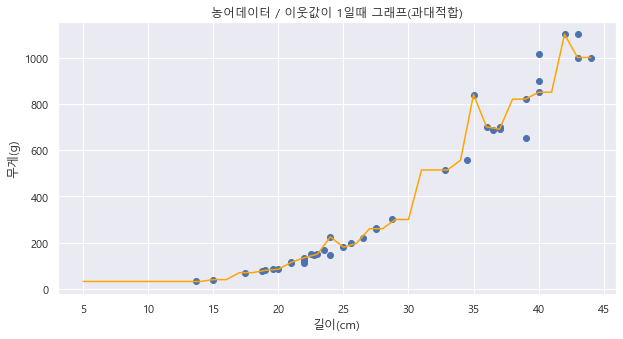

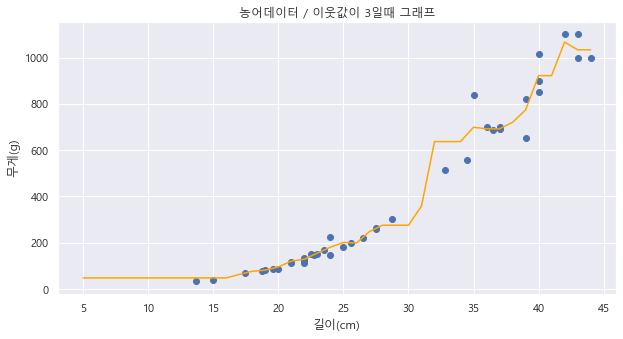

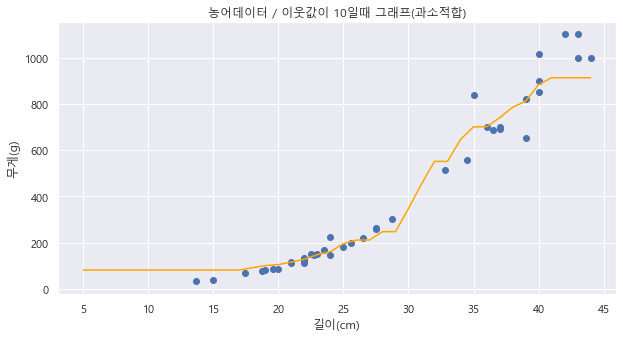

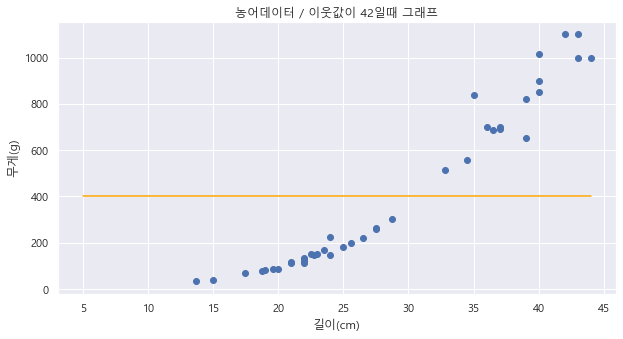

In [80]:
# KNN 회귀 객체를 만듦
knr = KNeighborsRegressor()
# 5~45까지 x좌표를 생성
x = np.arange(5,45).reshape(-1,1)

# k-이웃값을 1, 5, 10으로 변경하면서 예측을하고 차트 그리기
for n in [1, 3, 10, 42]:
    knr.n_neighbors = n
    knr.fit(X=new_train_input, y=train_target)
    
    # x에 대한 예측 도출
    pred= knr.predict(X=x)

    #훈련 세트와 예측 결과를 산점도에 표시
    plt.figure(figsize=(10,5))
    plt.scatter(x=new_train_input, y=train_target)
    plt.plot(x, pred, color="orange")
    #plt.subplot()
    title = f"농어데이터 / 이웃값이 {n}일때 그래프"
    if n == 1:
        title += "(과대적합)"
    elif n == 10:
        title += "(과소적합)"
    plt.title(title)
    plt.xlabel("길이(cm)")
    plt.ylabel("무게(g)")
    plt.show()

좋지 않은 그래프들